In [140]:
# Dependencies and Setup
import pandas as pd
import hvplot.pandas as hvplot
import matplotlib.pyplot as plt 

import numpy as np  
import requests 
import json 

from citipy import citipy
from api_keys import yelp_api_key

### Generate the NYC Borough Grocery Stores List by Using Yelp API

In [141]:
# Read the groceries.csv file and create a groceries DataFrame
groceries_df = pd.read_csv('../Resources/groceries.csv')
ev_df = pd.read_csv('../Resources/evcs.csv')
bars_df = pd.read_csv('../Resources/nyc_bars.csv')  

In [142]:

ev_df['Type'] = 'EVCS'
clean_ev_df = ev_df[['City', 'Station Name', 'Street Address', 'Type']]
clean_ev_df.head()


,City,Station Name,Street Address,Type
0,Queens,Queens Center - Tesla Supercharger,90-15 Queens Boulevard,EVCS
1,Brooklyn,INDUSTRY CITY LOT B EAST,533 2nd Ave,EVCS
2,Brooklyn,577 Baltic Street - Adam America Real Estate -...,577 Baltic Street,EVCS
3,Staten Island,Angelina's Ristorante - Tesla Destination,399 Ellis St,EVCS
4,Queens,33-10 Queens Blvd,33-10 Queens Blvd,EVCS


In [143]:
print(len(clean_ev_df))

181


In [144]:
bars_df['Type'] = 'Bar'
bars_df.columns

Index(['City', 'Name', 'Address', 'Type'], dtype='object')

In [145]:
groceries_df["Type"]= "Grocery"
groceries_df.columns

Index(['City', 'Name', 'Address', 'Type'], dtype='object')

In [146]:
print(len(groceries_df))


5000


In [147]:
boro_store_counts = groceries_df.groupby('City').size().reset_index(name='Count')

# Print the result
print(boro_store_counts)

            City  Count
0          Bronx   1000
1       Brooklyn   1000
2      Manhattan   1000
3         Queens   1000
4  Staten Island   1000


In [148]:
boro_store_countsevs = ev_df.groupby('City').size().reset_index(name='Count')

# Print the result
print(boro_store_countsevs)

            City  Count
0          Bronx     16
1       Brooklyn    101
2      Manhattan     16
3         Queens     18
4  Staten Island     30


In [149]:
boro_store_countsbars = bars_df.groupby('City').size().reset_index(name='Count')

# Print the result
print(boro_store_countsbars)

        City  Count
0   Brooklyn    920
1  Manhattan   1000
2     Queens   1000


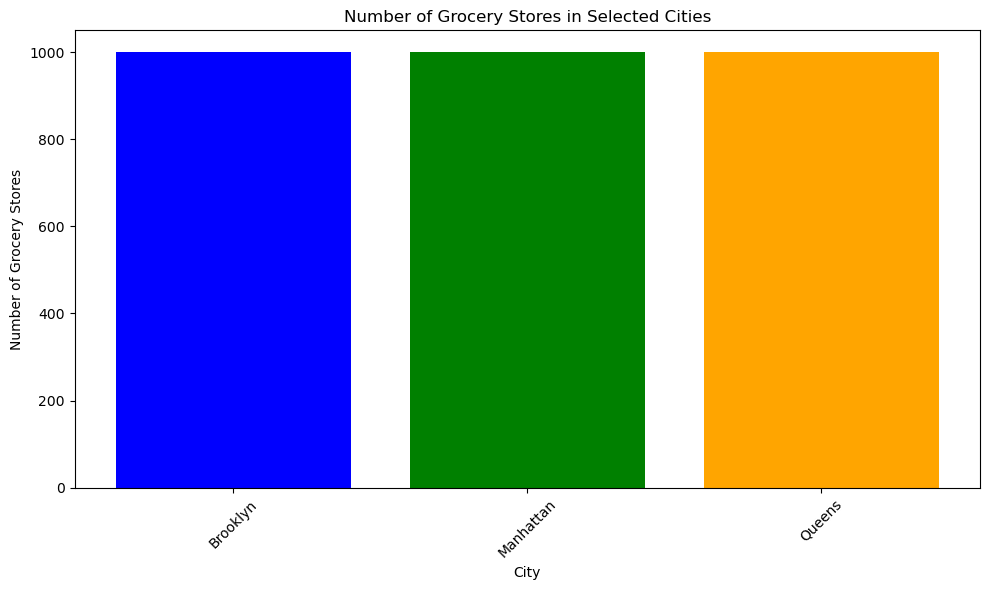

In [153]:
# Filter data for specific cities
selected_cities = ['Brooklyn', 'Manhattan', 'Queens']
filtered_boro_store_counts = boro_store_counts[boro_store_counts['City'].isin(selected_cities)]

# Sort the filtered DataFrame in descending order
sorted_filtered_boro_store_counts = filtered_boro_store_counts.sort_values(by='Count', ascending=False)

# Specify color palette
city_colors = ['blue', 'green', 'orange']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_filtered_boro_store_counts['City'], sorted_filtered_boro_store_counts['Count'], color=city_colors)
plt.xlabel('City')
plt.ylabel('Number of Grocery Stores')
plt.title('Number of Grocery Stores in Selected Cities')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


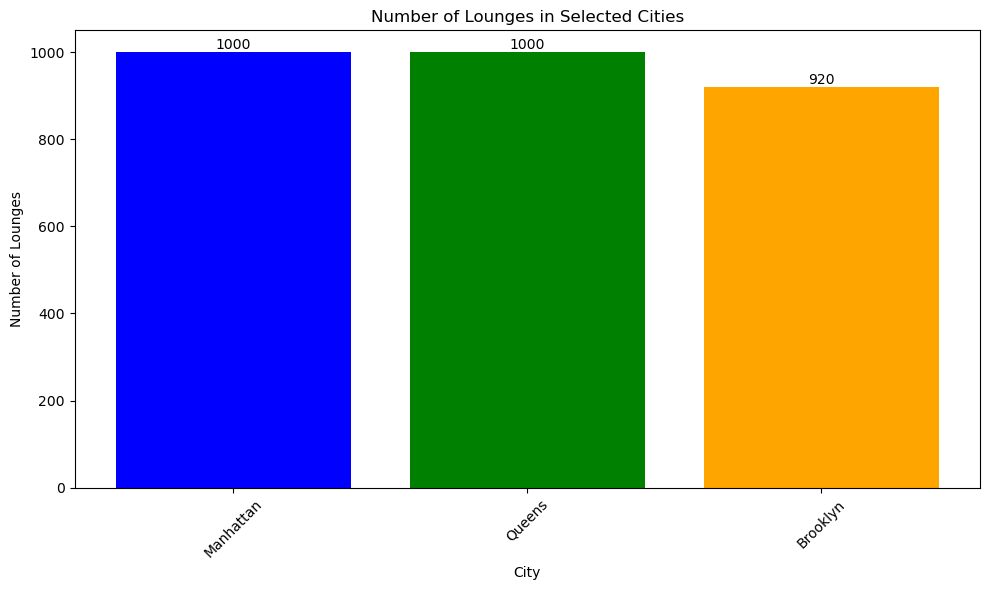

In [151]:

# Filter data for specific cities
selected_cities = ['Brooklyn', 'Manhattan', 'Queens']
filtered_boro_store_countsbars = boro_store_countsbars[boro_store_countsbars['City'].isin(selected_cities)]

# Sort the filtered DataFrame in ascending order
sorted_filtered_boro_store_countsbars = filtered_boro_store_countsbars.sort_values(by='Count', ascending=False)

# Create a color palette with unique colors for each city
city_colors = ['blue', 'green', 'orange']

# Create a bar chart with unique colors and ascending bars
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_filtered_boro_store_countsbars['City'], sorted_filtered_boro_store_countsbars['Count'], color=city_colors)
plt.xlabel('City')
plt.ylabel('Number of Lounges')
plt.title('Number of Lounges in Selected Cities')
plt.xticks(rotation=45)

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()

# Display the chart
plt.show()


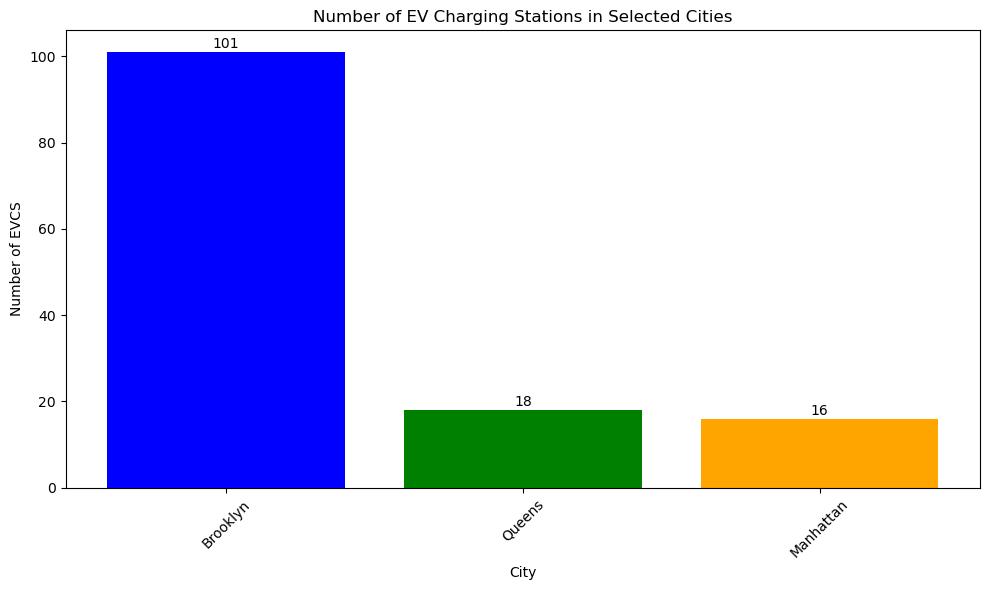

In [154]:

# Filter data for specific cities
selected_cities = ['Brooklyn', 'Manhattan', 'Queens']
filtered_boro_store_countsevs= boro_store_countsevs[boro_store_countsevs['City'].isin(selected_cities)]

# Sort the filtered DataFrame in ascending order
sorted_filtered_boro_store_countsevs = filtered_boro_store_countsevs.sort_values(by='Count', ascending=False)

# Create a color palette with unique colors for each city
city_colors = ['blue', 'green', 'orange']

# Create a bar chart with unique colors and ascending bars
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_filtered_boro_store_countsevs['City'], sorted_filtered_boro_store_countsevs['Count'], color=city_colors)
plt.xlabel('City')
plt.ylabel('Number of EVCS')
plt.title('Number of EV Charging Stations in Selected Cities')
plt.xticks(rotation=45)

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()

# Display the chart
plt.show()